## Business Analysis

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
import sys

sys.path.append((os.path.abspath('../scripts')))

from Utils import *
from Overview_analyzer import *

DbConn = DatabaseConn()


#### Loading data from database

In [3]:
data = DbConn.load_data_from_database()

### Exploratory analysis

In [4]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


**Obserbation**
- From the above analysis we can see that some columns contain missing values

In [6]:
# Instantiate the class to analyze the data
data_utils = DataUtils(data)

In [67]:
data.dtypes.value_counts()

float64    50
object      5
Name: count, dtype: int64

#### Understandings the data

In [7]:
data_info = data_utils.data_info()

**The data contains `150001` rows and `55` columns.**

**The data has `41` missing columns.**

**The column with the maximum number of missing values is `['Nb of sec with 37500B < Vol UL']`.**

**Columns with more than 50% missing values are:**
- `Nb of sec with 37500B < Vol UL`
- `Nb of sec with 6250B < Vol UL < 37500B`
- `Nb of sec with 125000B < Vol DL`
- `TCP UL Retrans. Vol (Bytes)`
- `Nb of sec with 31250B < Vol DL < 125000B`
- `Nb of sec with 1250B < Vol UL < 6250B`
- `Nb of sec with 6250B < Vol DL < 31250B`
- `TCP DL Retrans. Vol (Bytes)`
- `HTTP UL (Bytes)`
- `HTTP DL (Bytes)`


In [8]:
data_info.head(10) # The top ten columns contain more missing values than actual values

,Missing values,Missing Percentage,Dtypes
Nb of sec with 37500B < Vol UL,130254,86.835421,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.561503,float64
Nb of sec with 125000B < Vol DL,97538,65.024900,float64
TCP UL Retrans. Vol (Bytes),96649,64.432237,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.390251,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.928920,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.877607,float64
TCP DL Retrans. Vol (Bytes),88146,58.763608,float64
HTTP UL (Bytes),81810,54.539636,float64
HTTP DL (Bytes),81474,54.315638,float64


**Observation**
- These columns have more than 50% of the data missing therfore it is wise to drop them.

In [9]:
data_info.describe()

,Missing values,Missing Percentage
count,41.000000,41.000000
mean,25155.902439,16.770490
std,41901.934736,27.934437
min,1.000000,0.000667
25%,1.000000,0.000667
50%,755.000000,0.503330
75%,27829.000000,18.552543
max,130254.000000,86.835421


**Observations**
- On average the columns consists 16.7% missing values

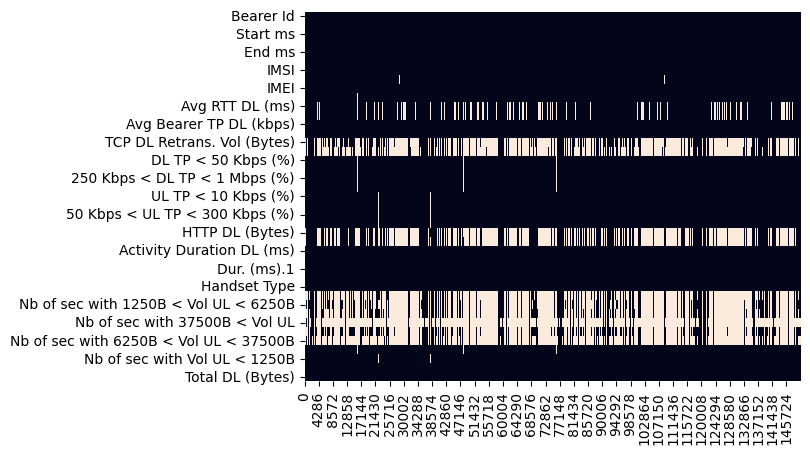

In [10]:
# Visualaization of missing values
data_utils.visualize_missing_values()

**Observation**
- From the graph we can see that the columns with the white area are null values

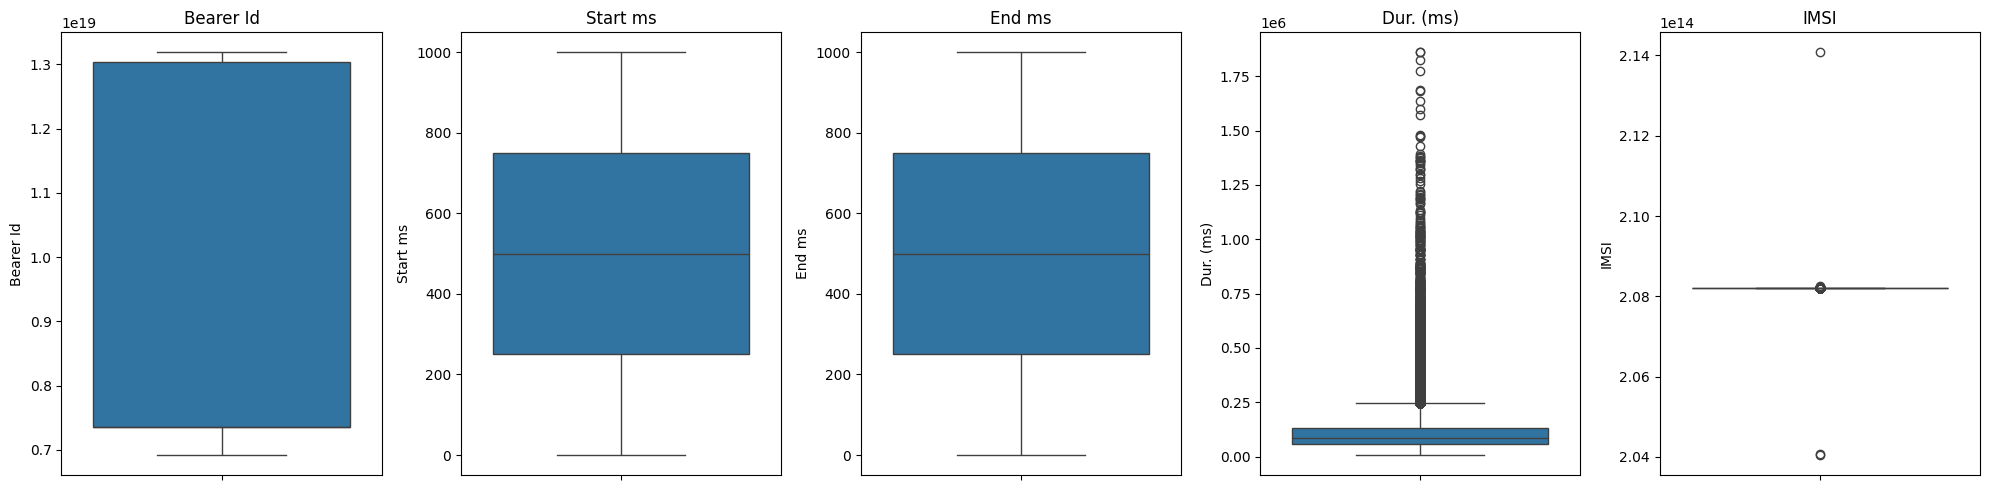

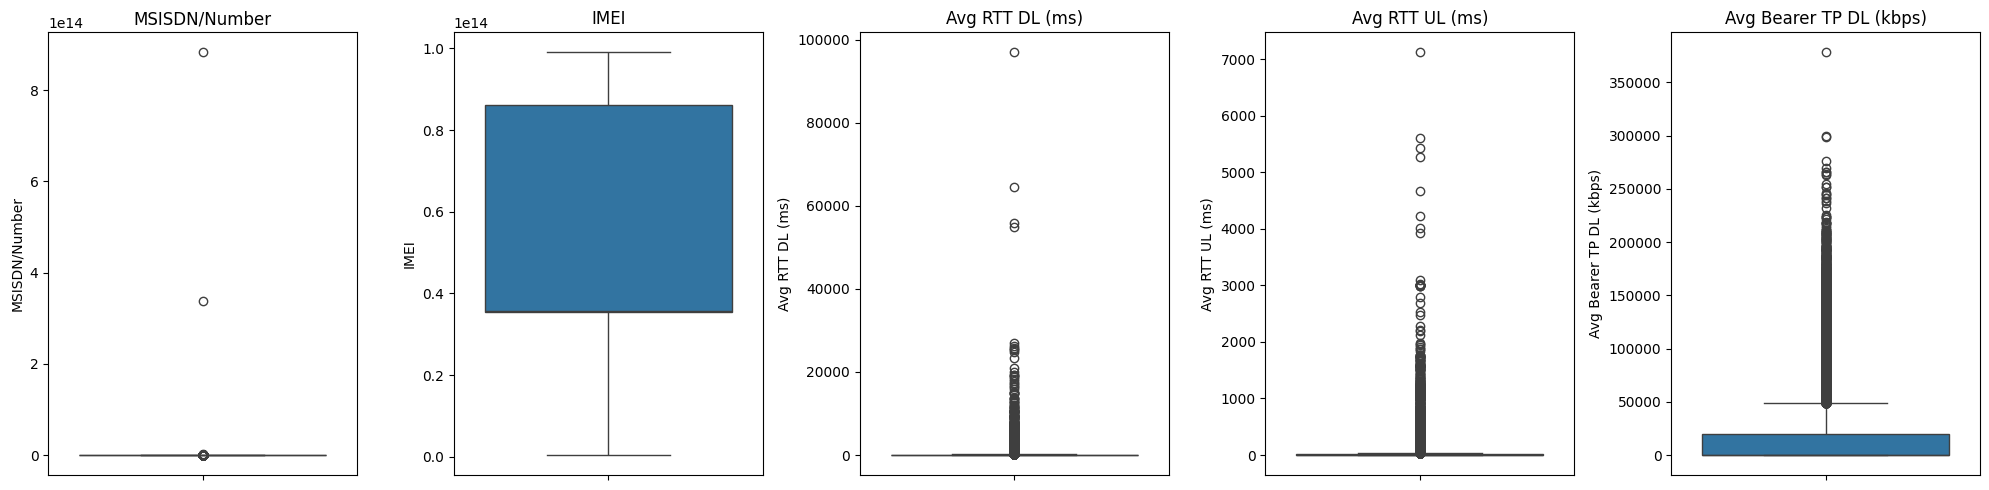

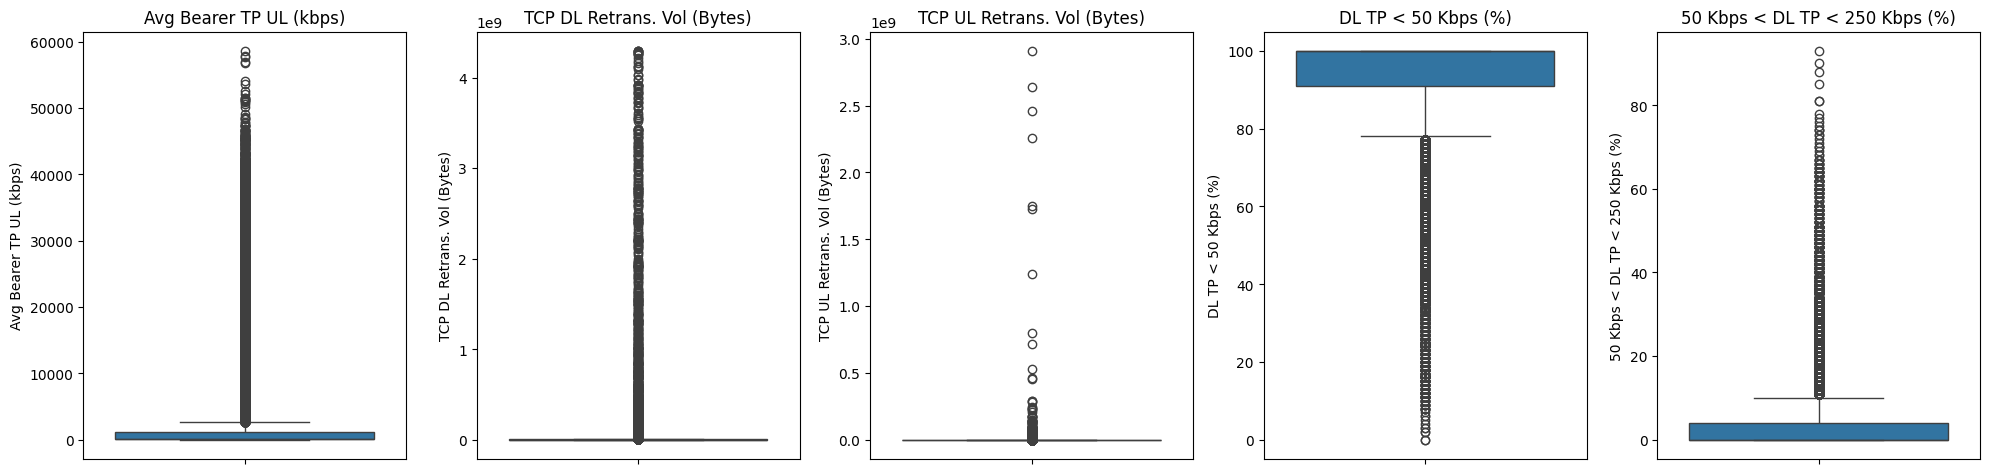

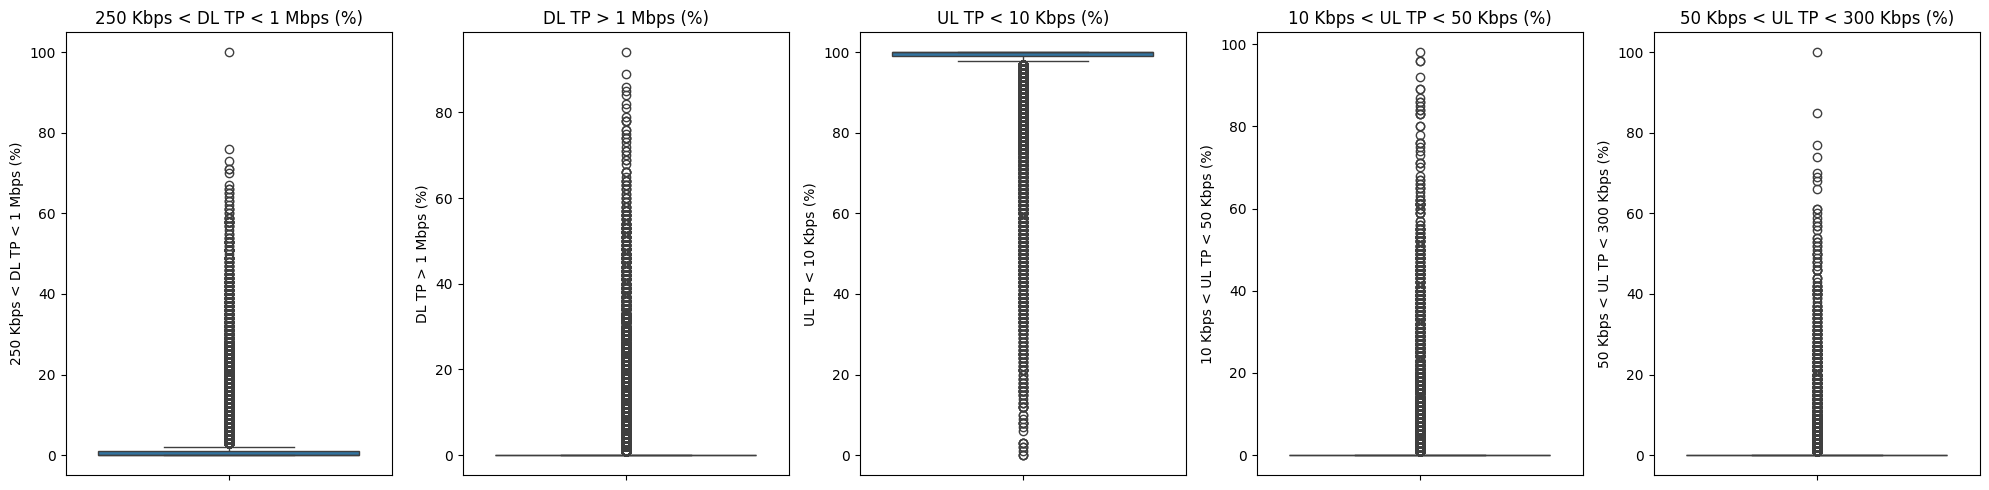

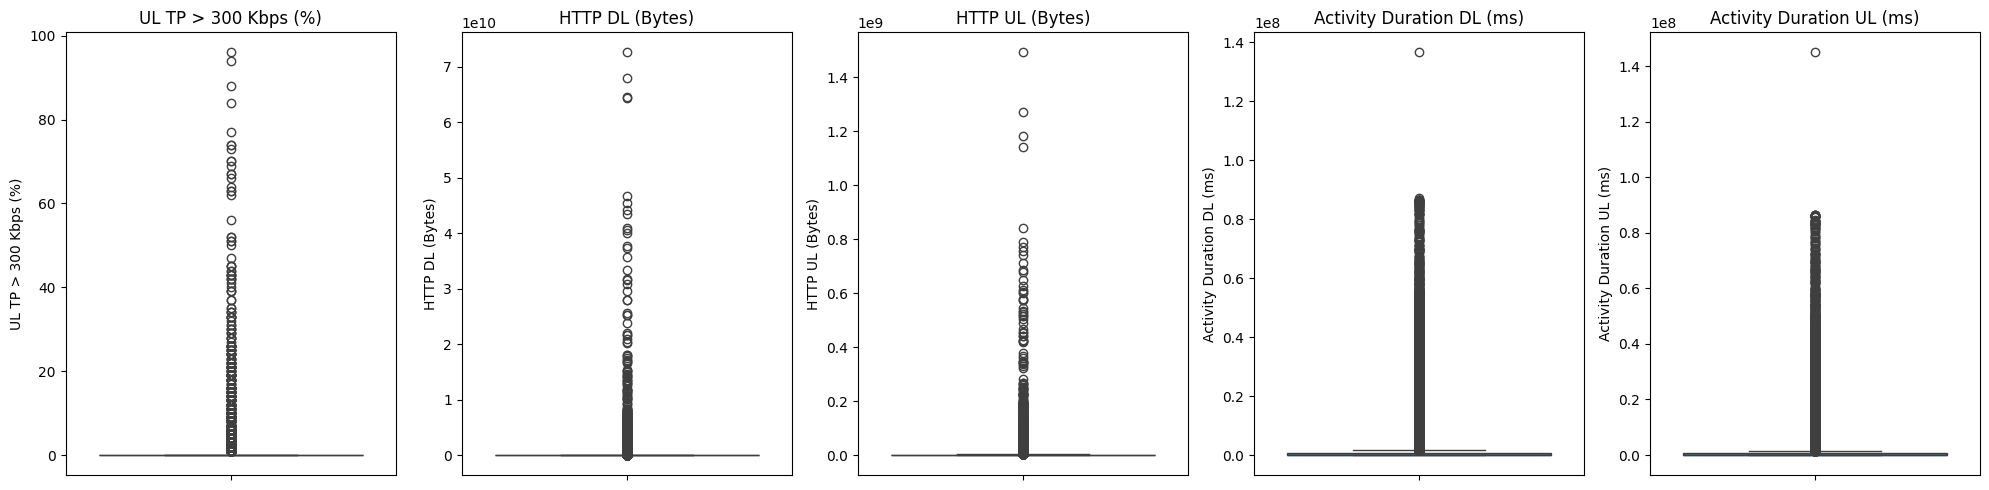

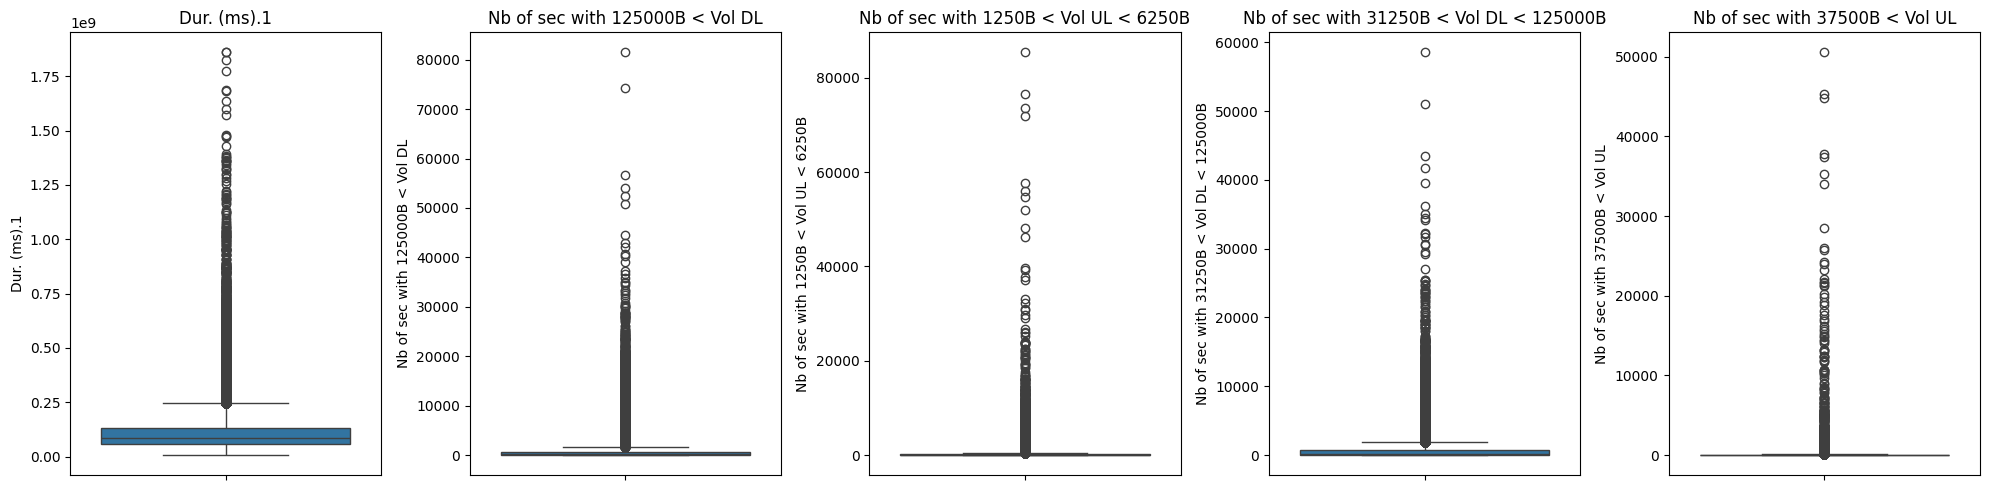

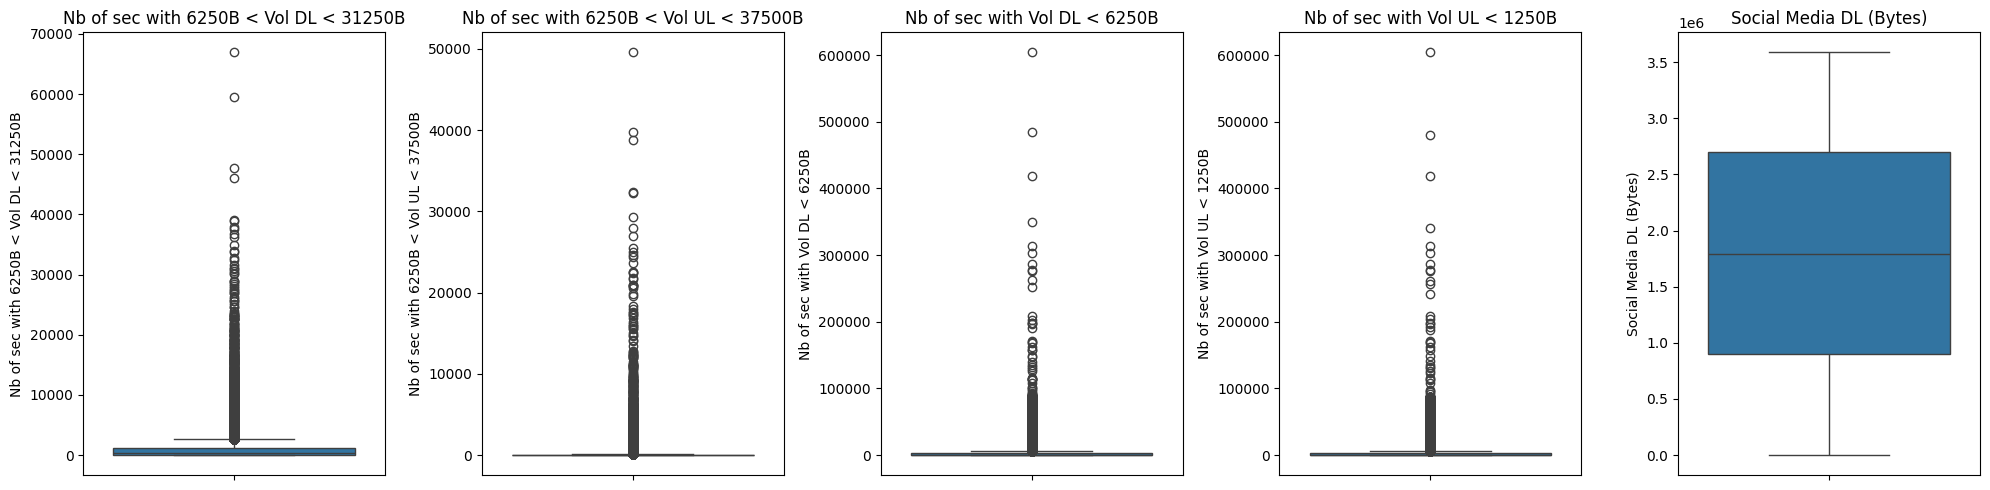

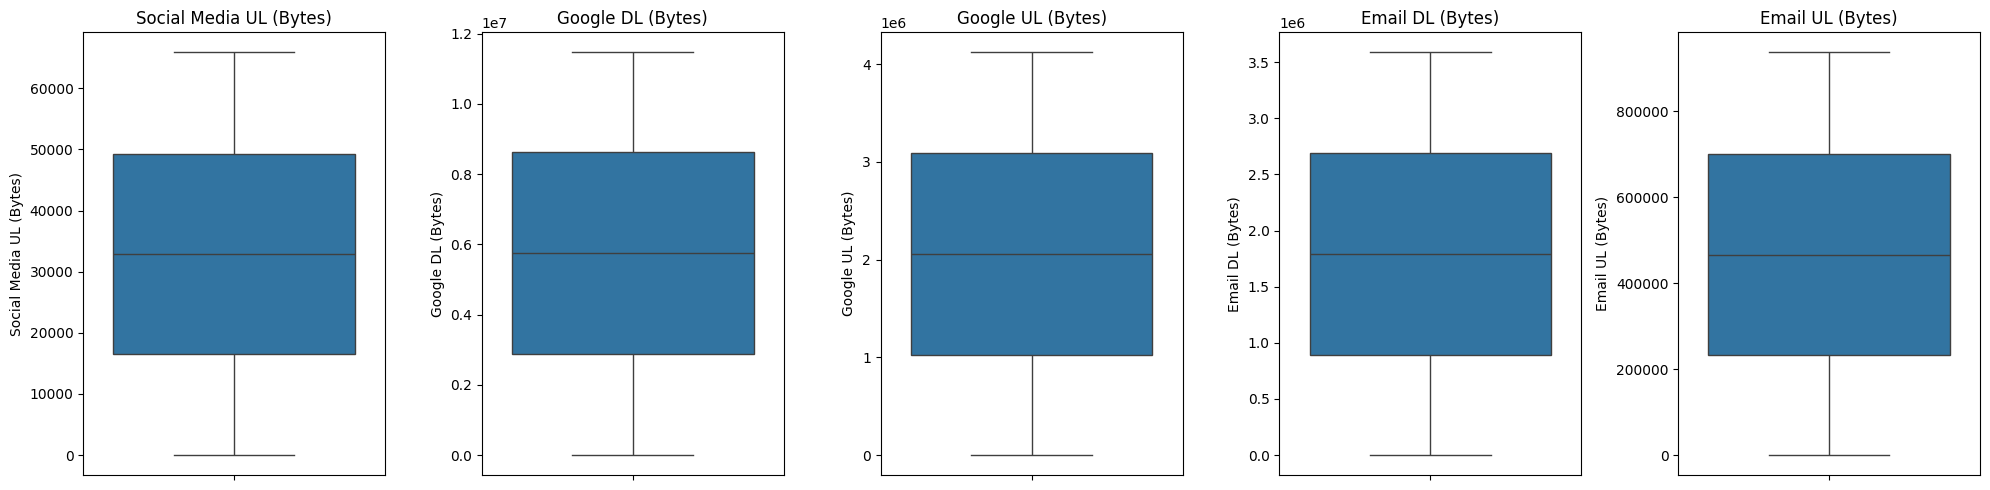

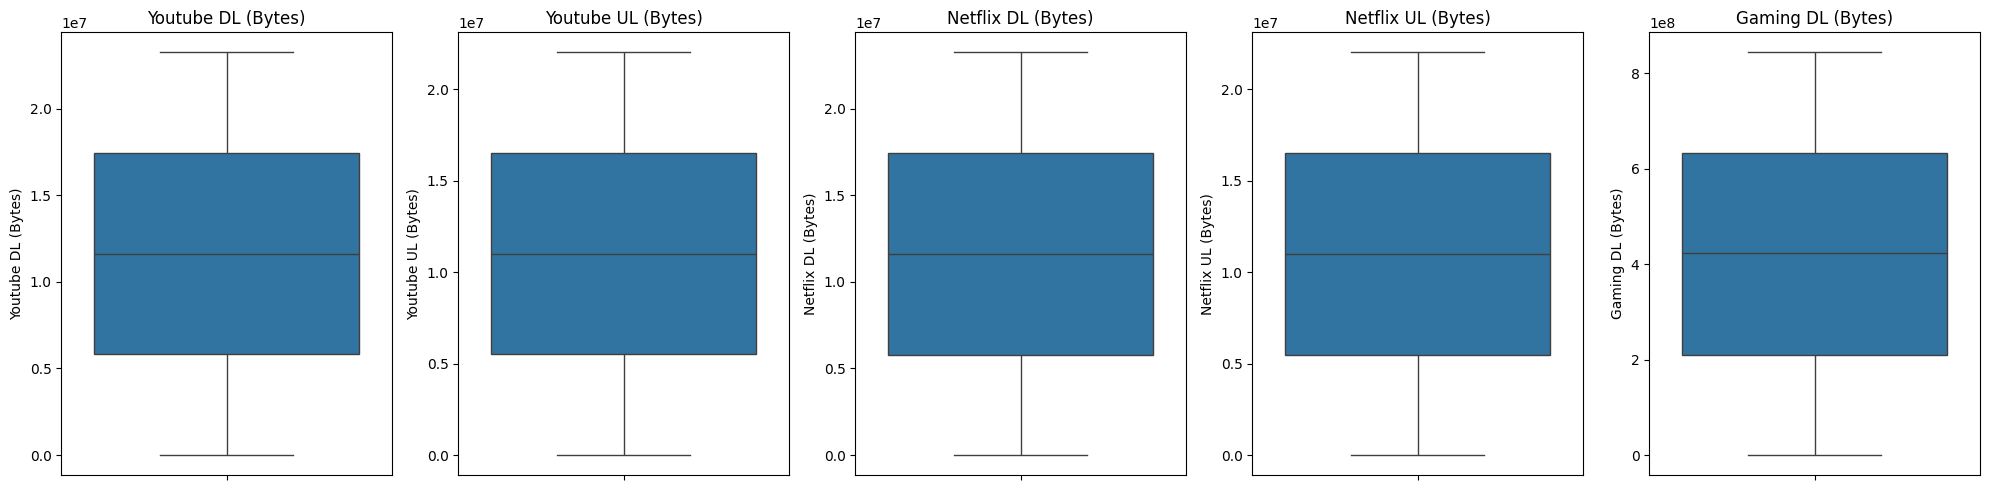

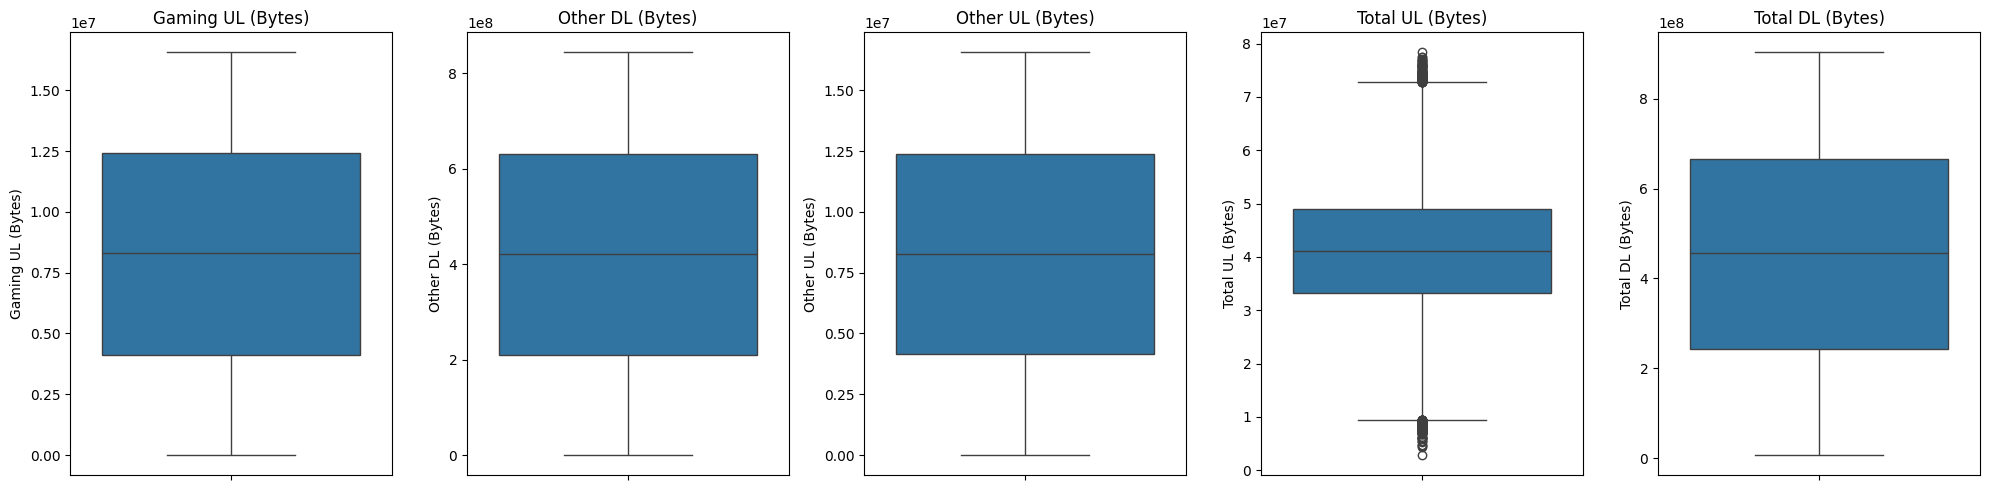

In [11]:
# Plot outliers
data_utils.visualize_outliers()

#### Data cleaning


In [12]:
# Deleting the top 10 datas with missing values  <-- Top 10 because they contain more nulls > 50% than the actual data
data_copy = data.copy()
data_copy.drop(list(data_info.head(10).index), axis=1, inplace=True)
data = data_copy

#### Standardizing the data and cleaning the data

In [13]:
data = data_utils.standardize_data('time') # changes ms to s
data = data_utils.standardize_data('volume') # chnages bytes to Mb

In [14]:
# These columns somehow are unique identifiers so filling them with other values is not a wise choice
uni_num_cols = ['MSISDN/Number', 'Bearer Id', 'IMEI'] 
uni_obj_cols = ['Last Location Name']

data[uni_num_cols] = data[uni_num_cols].fillna(0) # Filling these values with zero to indicat that they are missing
data[uni_obj_cols] = data[uni_obj_cols].fillna('unknown')



In [15]:
# Although the number of null values are small compared to the dataset size I filled the null values will unkown
# so that the analysis dosn't get affect by it.
obj_cols = ['Handset Manufacturer', 'Handset Type']
data[obj_cols] = data[obj_cols].fillna('unknown')

In [16]:
miss_date = ['Start', 'End']
data[miss_date] = data[miss_date].fillna(data[miss_date].mode(0))

In [17]:
## It is wise to use IMSI as a unique identifier for the user since IMSI doesn't change when the user changes equipment
## Deleting the rows that contian missing `IMSI` would be wise since `IMSI` is a unique identifier

data_info[data_info.index == 'IMSI'] 

,Missing values,Missing Percentage,Dtypes
IMSI,570,0.379997,float64


In [18]:
# Deleting null IMSI rows
missing_IMSI = data['IMSI'].isna()
data = data[~missing_IMSI]

In [19]:
# These are columns that will be filled with their corresponding means
missing_values_col = list(data.columns[data.isna().sum() != 0])

# Compute the means for these columns
means = data[missing_values_col].mean()

# Fill missing values in these columns with the computed means
data[missing_values_col] = data[missing_values_col].fillna(means)

C:\Users\user\AppData\Local\Temp\ipykernel_26892\1836872802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[missing_values_col] = data[missing_values_col].fillna(means)


In [20]:
# After cleaning all the columns the data dosn't contain any null values
data.isna().sum().sum()

np.int64(0)

In [21]:
data.shape

(149431, 55)

### Overview Analysis

In [22]:
overview_analyzer = OverviewAnalyzer(data)

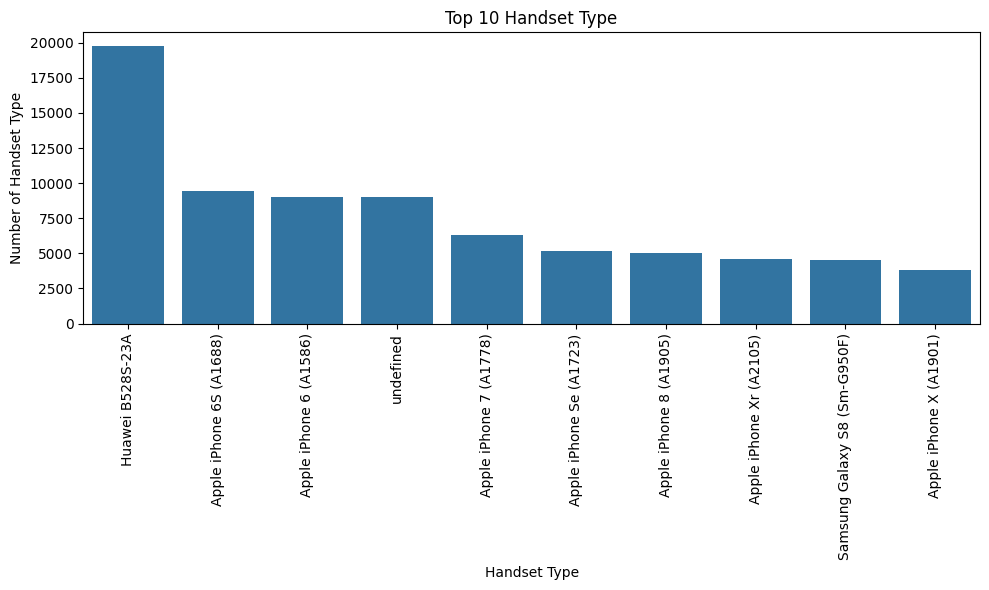

In [23]:
# The top 10 handset types
Top_10_headsets = overview_analyzer.top_identifier('Handset Type', 10)

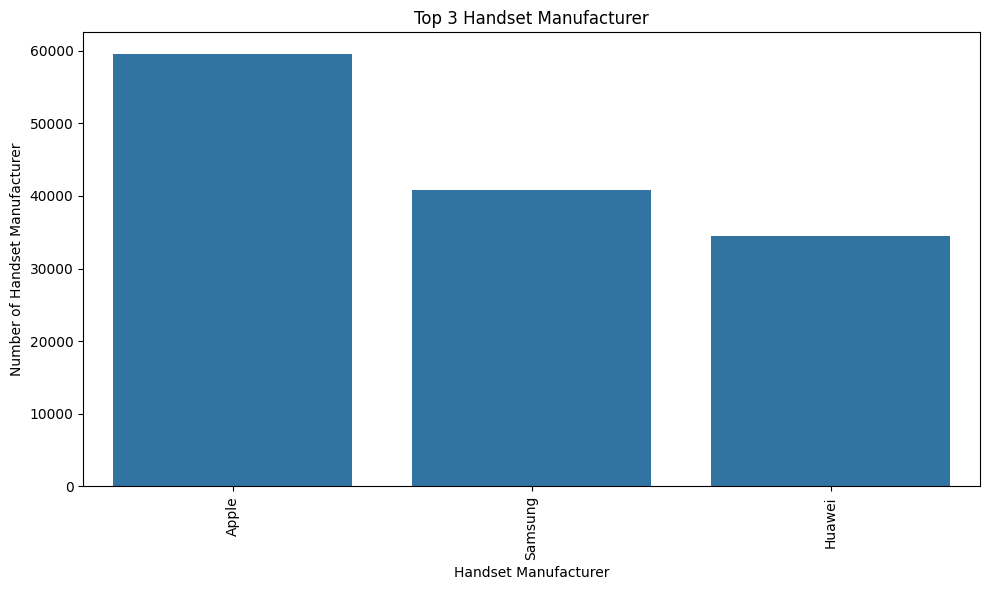

In [24]:
# The top 3 manufacturers
Top_3_manufacturer = overview_analyzer.top_identifier('Handset Manufacturer', 3)

In [25]:
# The top 5 handsets per top 3 handset manufacturer

Top_manufacturer_data = data[data['Handset Manufacturer'].isin(Top_3_manufacturer.index)]
Top_headset_per_manufacturer = Top_manufacturer_data.groupby(by= ['Handset Manufacturer', 'Handset Type'])['Handset Type'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
Top_headset_per_manufacturer


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

<Axes: xlabel='Handset Manufacturer'>

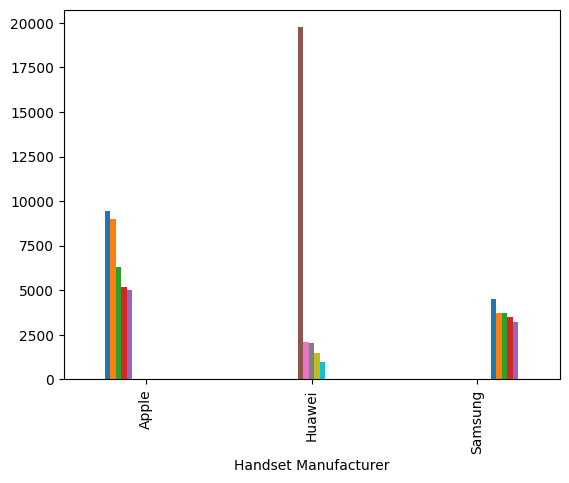

In [26]:
Top_headset_per_manufacturer.unstack().plot(kind='bar', legend=False)

In [27]:
Top_3_manufacturer

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [28]:
# 
print(f'The percentage of 1 product by Huawei compared to other products by Huawei:   {round(100 * 19752/34423, 2)} %')

The percentage of 1 product by Huawei compared to other products by Huawei:   57.38 %


In [29]:
Top_manufacturer_data.groupby(by= ['Handset Manufacturer', 'Handset Type'])['Handset Type'].value_counts().groupby(level=0).size()

Handset Manufacturer
Apple       70
Huawei     166
Samsung    189
Name: count, dtype: int64

**Observation**
- **Top Manufacturer Analysis**: From the analysis, we observe that Apple is the leading manufacturer, followed by Samsung and Huawei. This ranking is based on the total number of handsets sold.

- **Huawei's Product Success**: Interestingly, Huawei's success is primarily driven by a single handset model, which accounts for 57.8% of its total handset sales. This suggests a strong dependency on one product for its market performance.

- **Product Diversity**: Apple, despite having only 70 different handset models, outperforms both Samsung and Huawei. In comparison, Huawei offers 166 models, and Samsung leads with 189 models. This indicates that Apple's strategy of focusing on a smaller, more refined product line is more effective than having a large, diverse portfolio.

- **Sales Consistency vs. Product Popularity**: The data implies that consistent sales across a range of products are more crucial to a manufacturer's overall success than relying on the popularity of a single product. While Huawei's high sales are concentrated in one handset, Apple and Samsung achieve success through a more balanced and widespread appeal across their product lines.

- **Strategic Implication**: For manufacturers, this analysis suggests that investing in the consistent performance of multiple products may lead to sustained success. A strategy focused on building a strong, diversified portfolio could be more advantageous than one relying heavily on a single, standout product.

- **Recomendation to marketing team**: 
    * <u>Apple's Success Model</u>: Emulate Apple’s strategy by concentrating on developing and marketing a smaller range of high-quality, differentiated products. Apple's success with fewer handset models suggests that customers are drawn to a well-curated product lineup that offers clear value propositions.
    * <u>Diversify Sales Focus</u>: Unlike Huawei, which relies heavily on one successful product, ensure that marketing efforts are spread across multiple products. This reduces dependency on a single product and builds a more resilient market presence.

In [30]:
# Number of xdr sessions per user
xdr_per_user = overview_analyzer.per_user_counter('Bearer Id', count=True)
xdr_per_user

IMSI
2.082014e+14    18
2.082010e+14    17
2.082017e+14    17
2.082019e+14    16
2.082010e+14    15
                ..
2.082099e+14     1
2.082099e+14     1
2.082099e+14     1
2.082099e+14     1
2.082099e+14     1
Name: Bearer Id, Length: 107265, dtype: int64

In [31]:
# session duration per user in seconds
session_dur = overview_analyzer.per_user_counter('Dur. (s)', count=False)
session_dur

IMSI
2.082010e+14    18553.754
2.082017e+14     9966.898
2.082021e+14     9279.434
2.082014e+14     8791.927
2.082009e+14     8744.914
                  ...    
2.082015e+14        7.267
2.082010e+14        7.258
2.082019e+14        7.189
2.082014e+14        7.146
2.082017e+14        7.142
Name: Dur. (s), Length: 107265, dtype: float64

In [32]:
# the total download (DL) per user
total_dl_user = overview_analyzer.per_user_counter('Total DL (MB)', count=False)
total_dl_user

IMSI
2.082017e+14    7778.876775
2.082021e+14    7449.431784
2.082010e+14    7410.090773
2.082010e+14    6970.922295
2.082014e+14    6963.268795
                   ...     
2.082010e+14       9.017570
2.082014e+14       8.845926
2.082022e+14       8.773344
2.082017e+14       8.627137
2.082099e+14       8.418161
Name: Total DL (MB), Length: 107265, dtype: float64

In [33]:
# the total download (UL) per user
total_ul_user = overview_analyzer.per_user_counter('Total UL (MB)', count=False)
total_ul_user


IMSI
2.082010e+14    695.779209
2.082021e+14    670.889455
2.082017e+14    657.542230
2.082014e+14    638.628694
2.082019e+14    595.341035
                   ...    
2.082010e+14      5.647641
2.082018e+14      5.208289
2.082009e+14      5.032278
2.082015e+14      4.137789
2.082019e+14      2.734081
Name: Total UL (MB), Length: 107265, dtype: float64

In [34]:
# total data volume (MB) during this session for each application: Social Media
cols = ['Social Media UL (MB)', 'Social Media DL (MB)']
social_media = overview_analyzer.per_user_counter(cols, count=False)
social_media

IMSI
2.082014e+14    41.365413
2.082021e+14    37.940206
2.082019e+14    33.771856
2.082017e+14    26.983780
2.082010e+14    25.878429
                  ...    
2.082014e+14     0.007155
2.082019e+14     0.007040
2.082015e+14     0.004262
2.082014e+14     0.001910
2.082017e+14     0.001491
Length: 107265, dtype: float64

In [35]:
# total data volume (MB) during this session for each application:  YouTube 
cols = ['Youtube UL (MB)', 'Youtube DL (MB)']
YouTube = overview_analyzer.per_user_counter(cols, count=False)
YouTube

IMSI
2.082010e+14    431.975144
2.082021e+14    377.930830
2.082017e+14    376.100748
2.082014e+14    357.134864
2.082010e+14    302.706310
                   ...    
2.082017e+14      0.228269
2.082099e+14      0.216066
2.082003e+14      0.198321
2.082017e+14      0.150152
2.082019e+14      0.075248
Length: 107265, dtype: float64

In [36]:
# total data volume (MB) during this session for each application:  Netflix  
cols = ['Netflix UL (MB)', 'Netflix DL (MB)']
Netflix = overview_analyzer.per_user_counter(cols, count=False)
Netflix

IMSI
2.082019e+14    381.011085
2.082017e+14    344.658895
2.082010e+14    340.443236
2.082021e+14    319.140691
2.082014e+14    313.497295
                   ...    
2.082018e+14      0.270970
2.082014e+14      0.248196
2.082003e+14      0.237110
2.082018e+14      0.192226
2.082010e+14      0.176019
Length: 107265, dtype: float64

In [37]:
# total data volume (MB) during this session for each application:  Google   
cols = ['Google UL (MB)', 'Google DL (MB)']
Google = overview_analyzer.per_user_counter(cols, count=False)
Google  

IMSI
2.082014e+14    145.141460
2.082010e+14    135.715404
2.082017e+14    122.045314
2.082021e+14    117.514705
2.082019e+14    111.118646
                   ...    
2.082014e+14      0.107454
2.082019e+14      0.107374
2.082009e+14      0.095201
2.082017e+14      0.085693
2.082015e+14      0.038462
Length: 107265, dtype: float64

In [38]:
# total data volume (MB) during this session for each application:  Google   
cols = ['Email UL (MB)', 'Email DL (MB)']
Email = overview_analyzer.per_user_counter(cols, count=False)
Email 

IMSI
2.082014e+14    40.453703
2.082017e+14    38.899073
2.082010e+14    38.751570
2.082017e+14    34.628032
2.082019e+14    34.332077
                  ...    
2.082014e+14     0.028087
2.082014e+14     0.026229
2.082014e+14     0.024906
2.082014e+14     0.024879
2.082014e+14     0.017334
Length: 107265, dtype: float64

In [39]:
# total data volume (MB) during this session for each application:  Gaming   
cols = ['Gaming UL (MB)', 'Gaming DL (MB)']
Gaming = overview_analyzer.per_user_counter(cols, count=False)
Gaming

IMSI
2.082017e+14    7390.434488
2.082021e+14    7115.407207
2.082010e+14    6987.260329
2.082010e+14    6647.651288
2.082014e+14    6568.500629
                   ...     
2.082019e+14       1.126197
2.082015e+14       0.895611
2.082019e+14       0.658072
2.082019e+14       0.567794
2.082019e+14       0.292166
Length: 107265, dtype: float64

In [40]:
# total data volume (MB) during this session for each application:  Other   
cols = ['Other UL (MB)', 'Other DL (MB)']
Other = overview_analyzer.per_user_counter(cols, count=False)
Other

IMSI
2.082014e+14    7789.495255
2.082017e+14    7285.369465
2.082010e+14    6483.569288
2.082010e+14    6060.202681
2.082019e+14    6033.583521
                   ...     
2.082003e+14       1.077696
2.082015e+14       1.075614
2.082019e+14       0.927665
2.082003e+14       0.488061
2.082010e+14       0.142140
Length: 107265, dtype: float64

#### Variable transformations: Decile classes

In [41]:
user_behaviour = pd.concat([xdr_per_user, session_dur, total_dl_user,
                            total_ul_user, social_media, YouTube,
                            Netflix, Google, Email,
                            Gaming, Other], axis=1)

user_behaviour.columns = ['Total_sessions', 'Total_duration', 'Total_Dl', 'Total_Ul', 'Social_media', 
                          'YouTube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

user_behaviour.head()

,Total_sessions,Total_duration,Total_Dl,Total_Ul,Social_media,YouTube,Netflix,Google,Email,Gaming,Other
IMSI,,,,,,,,,,,
2.082014e+14,18,8791.927,6963.268795,638.628694,41.365413,357.134864,313.497295,145.141460,40.453703,6568.500629,7789.495255
2.082010e+14,17,18553.754,7410.090773,695.779209,25.878429,431.975144,340.443236,135.715404,38.751570,6987.260329,6060.202681
2.082017e+14,17,9966.898,7778.876775,657.542230,26.983780,376.100748,344.658895,122.045314,38.899073,7390.434488,7285.369465
2.082019e+14,16,4035.428,6753.542387,595.341035,33.771856,246.039474,381.011085,111.118646,34.332077,6413.993083,6024.756896
2.082010e+14,15,4865.947,6970.922295,554.627220,18.332406,302.706310,294.774207,104.771139,30.054494,6647.651288,6483.569288


In [42]:
user_behaviour['Decile'] = pd.qcut(user_behaviour['Total_duration'], 10, labels=False) 

In [43]:
# these are top five decile classes based on the total duration
top_5_deciles = user_behaviour[user_behaviour['Decile'] >= 5] 

In [44]:
top_5_deciles['Total_data'] = top_5_deciles['Total_Dl'] + top_5_deciles['Total_Ul']

C:\Users\user\AppData\Local\Temp\ipykernel_26892\3263421624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_deciles['Total_data'] = top_5_deciles['Total_Dl'] + top_5_deciles['Total_Ul']


In [45]:
# Total data per decile class with mega-bytes
top_5_deciles_data = top_5_deciles.groupby(by='Decile')['Total_data'].sum()

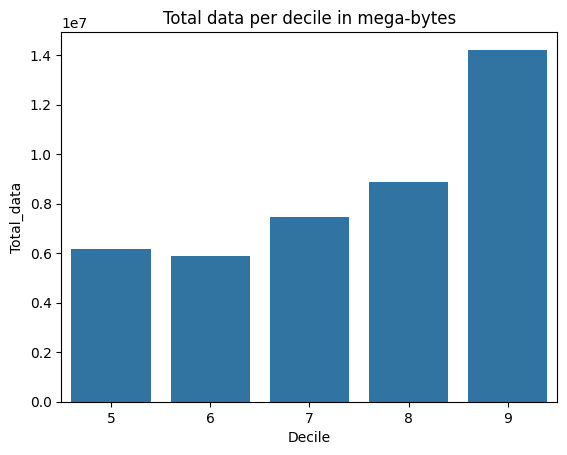

In [46]:
sns.barplot(top_5_deciles_data)
plt.title('Total data per decile in mega-bytes')
plt.show()

In [47]:
top_5_deciles_data.describe()

count    5.000000e+00
mean     8.529255e+06
std      3.401533e+06
min      5.890094e+06
25%      6.153497e+06
50%      7.479760e+06
75%      8.898538e+06
max      1.422438e+07
Name: Total_data, dtype: float64

### Analyzing basic metrics

In [48]:
cols = ['Total_data', 'Total_duration', 'Total_sessions', 'Social_media','YouTube','Netflix','Google','Email','Gaming',	'Other']
top_5_deciles[cols].agg(['mean', 'median', 'std', 'max', 'min'])

,Total_data,Total_duration,Total_sessions,Social_media,YouTube,Netflix,Google,Email,Gaming,Other
mean,795.164707,229.916601,1.683174,2.934971,36.358559,36.275644,12.521589,3.628390,690.182807,688.813760
median,687.348554,172.799000,1.000000,2.579605,30.011395,29.877465,10.602275,3.103233,606.124485,602.280191
std,565.807148,233.519316,1.016400,2.177680,24.798055,24.800344,8.741800,2.568535,513.047263,513.257135
max,8436.419004,18553.754000,18.000000,41.365413,431.975144,381.011085,145.141460,40.453703,7390.434488,7789.495255
min,32.020416,102.451000,1.000000,0.001491,0.075248,0.237110,0.085693,0.024906,0.292166,0.927665


**Observation**
- Mean, median objective could be grouping customers into segments and acts as a baseline
- std could tell us the variability of data and in this context it could tell us the consistency of user data 
- min, max just tell us the highest and the lowest could help us compare with the mean to see the difference

### Non-Graphical Univariate Analysis with dispersion parameters

In [49]:
top_5_deciles[cols].describe()

,Total_data,Total_duration,Total_sessions,Social_media,YouTube,Netflix,Google,Email,Gaming,Other
count,53632.000000,53632.000000,53632.000000,53632.000000,53632.000000,53632.000000,53632.000000,53632.000000,53632.000000,53632.000000
mean,795.164707,229.916601,1.683174,2.934971,36.358559,36.275644,12.521589,3.628390,690.182807,688.813760
std,565.807148,233.519316,1.016400,2.177680,24.798055,24.800344,8.741800,2.568535,513.047263,513.257135
min,32.020416,102.451000,1.000000,0.001491,0.075248,0.237110,0.085693,0.024906,0.292166,0.927665
25%,409.209710,139.469750,1.000000,1.417063,20.073875,19.915124,6.617703,1.898610,335.662030,331.162954
50%,687.348554,172.799000,1.000000,2.579605,30.011395,29.877465,10.602275,3.103233,606.124485,602.280191
75%,1022.176466,256.347000,2.000000,3.778262,46.650645,46.835288,16.117302,4.654993,886.931153,886.128938
max,8436.419004,18553.754000,18.000000,41.365413,431.975144,381.011085,145.141460,40.453703,7390.434488,7789.495255


In [50]:
uni_dispersion = top_5_deciles[cols].agg([lambda x: x.max() - x.min(), 'std', 
                                          lambda x: x.quantile(0.75) - x.quantile(0.25)]).set_axis(['Range', 'STD', 'IQR'])

uni_dispersion

,Total_data,Total_duration,Total_sessions,Social_media,YouTube,Netflix,Google,Email,Gaming,Other
Range,8404.398588,18451.303000,17.0000,41.363922,431.899897,380.773974,145.055767,40.428797,7390.142323,7788.567590
STD,565.807148,233.519316,1.0164,2.177680,24.798055,24.800344,8.741800,2.568535,513.047263,513.257135
IQR,612.966755,116.877250,1.0000,2.361200,26.576769,26.920164,9.499599,2.756383,551.269122,554.965983


**Observation**
- <u>High Variability in Gaming, Data Usage and Others</u>: The most significant variability is seen in gaming, Others and total data usage, indicating that these activities differ greatly among users.
- <u>Consistency in Social Media and Email Usage</u>: Social media and email usage are more consistent, with lower ranges and variability, suggesting more uniform behavior among users.
- <u>Streaming Services</u>: Both YouTube and Netflix show moderate variability, indicating that while most users have similar usage patterns, there are still significant outliers.

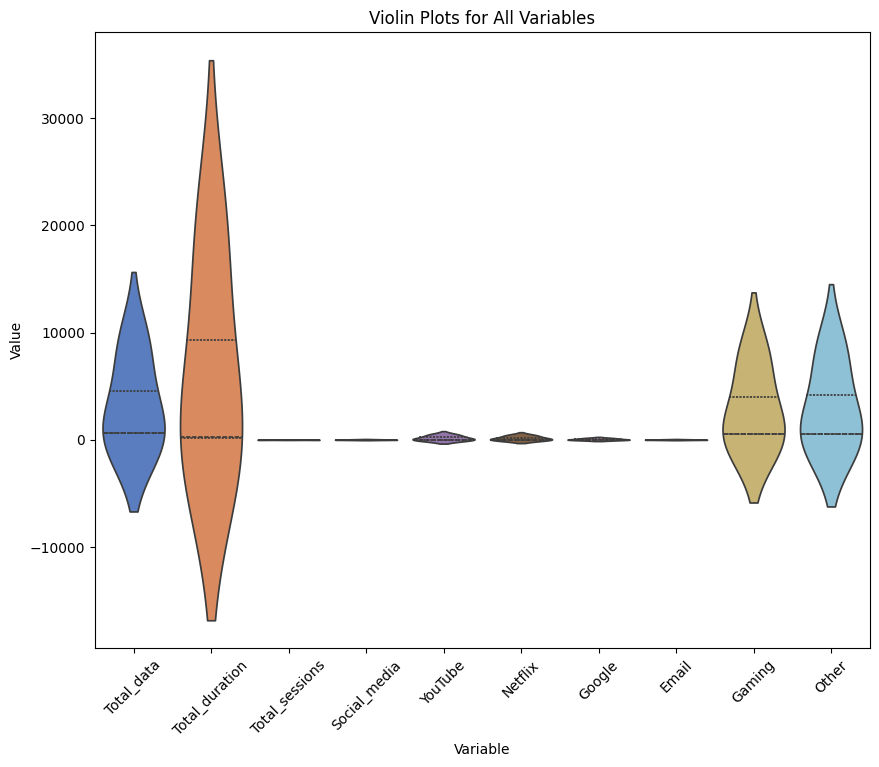

In [51]:
overview_analyzer.univariant_plot(uni_dispersion)

**Observation**
- **Total_data and Total_duration:**
These variables have the widest distributions, indicating that the values vary significantly across different instances.
Total_data: The distribution appears to be somewhat symmetrical, with a clear density around the lower and middle ranges, indicating that a large number of data points cluster around these values.
Total_duration: This variable also has a wide range of values, with the data showing a tendency toward the middle of the distribution. The higher range of the variable suggests that there are some instances with significantly higher values.
- **Total_sessions:**
The violin plot is very narrow, indicating minimal variation in the data. The data points are tightly clustered around a specific value, suggesting that the number of sessions is relatively consistent across the dataset.
- Social_media, YouTube, Netflix, and Google:
These variables show fairly narrow distributions, indicating consistent usage patterns across the dataset.
The slight width in some of these plots shows that while most users have similar behaviors, there are some outliers or less common usage patterns.
- **Email:**
The violin plot for Email is almost non-existent in width, indicating that the data for this variable is very consistent and doesn’t vary much across instances.
- **Gaming and Other:**
Gaming: This variable shows a somewhat wider distribution, indicating more variability in how much time or data is spent on gaming.
Other: Similar to Gaming, this variable also shows a wider distribution, suggesting a diverse range of behaviors in whatever is categorized under "Other."

**General Observations:**
- The plots for Total_data and Total_duration are much wider compared to others, indicating that these variables have the most variability and may be key drivers in your analysis.
The narrow plots for variables like Total_sessions, Social_media, YouTube, Netflix, and Google suggest more consistent usage patterns.

**Next Steps:**
Further Analysis: It may be beneficial to investigate why Total_data and Total_duration are so variable. Are there specific factors or segments driving these differences?
Outliers: Consider examining the outliers in variables with narrow distributions, like Email and Total_sessions, to understand if there are any significant deviations from the norm that could be interesting.

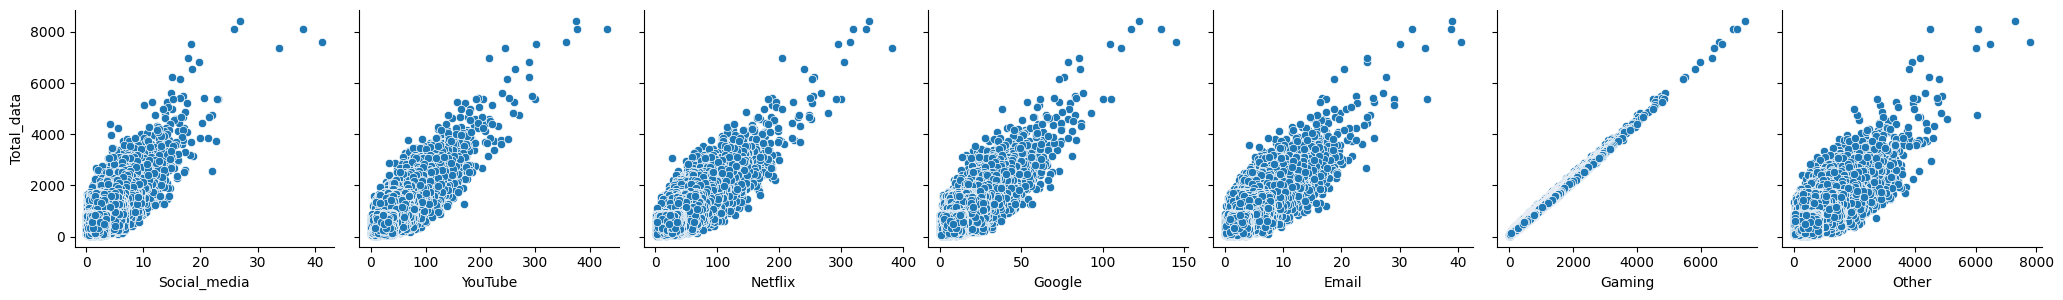

In [52]:
cols = ['Total_data','Social_media', 'YouTube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
sns.pairplot(top_5_deciles, 
             y_vars=['Total_data'],
             x_vars=['Social_media', 'YouTube', 'Netflix', 'Google','Email', 'Gaming', 'Other'], 
             height=3)

**Observation**
- Strong positive correlation between total data and applications but the gaming category stands out.

#### Correlation Analysis

<Axes: >

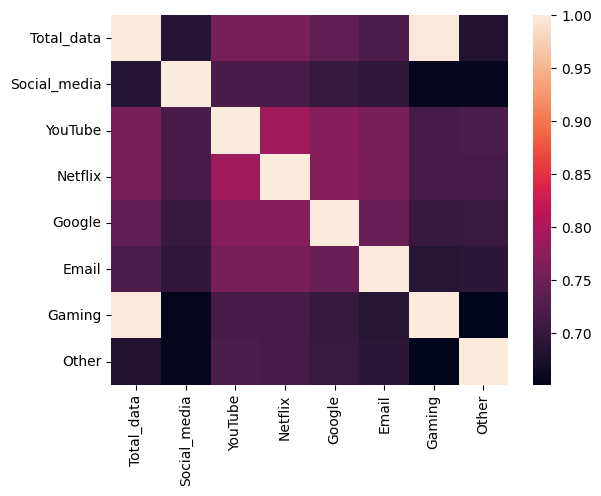

In [56]:
cols = ['Total_data','Social_media', 'YouTube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
corr_matrix = top_5_deciles[cols].corr()
sns.heatmap(corr_matrix)

**Observation**
- Again we can see there is a very high correlation between gaming and total_data